# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [327]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

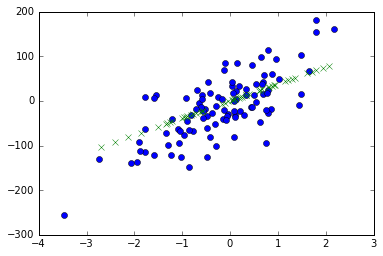

In [207]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
#plt.plot(x1,y1,'o')

############### More DATASETS


(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=1)
(x2_test,y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
#plt.plot(x2,y2,'o')

(x3,y3) = make_regression(n_samples=100, n_features=n_dimensions, noise=50)
(x3_test,y3_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=0)
plt.plot(x3,y3,'o')
plt.plot(x3_test,y3_test,'x')


(x4,y4) = make_regression(n_samples=10, n_features=n_dimensions, noise=5)
(x4_test,y4_test) = make_regression(n_samples=5, n_features=n_dimensions, noise=noise)
#plt.plot(x4,y4,'o')

(x5,y5) = make_regression(n_samples=3, n_features=n_dimensions, noise=1)



# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

0.897857473231


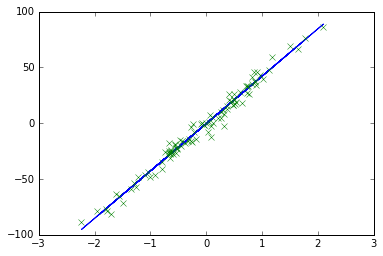

-0.398515258799


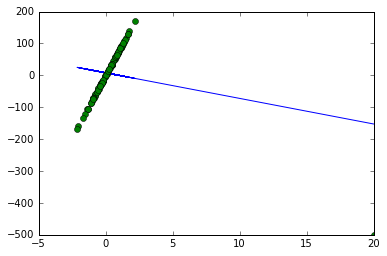

0.0949419869694


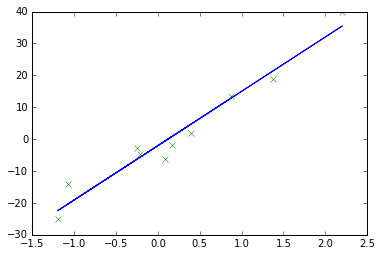

0.849305429957


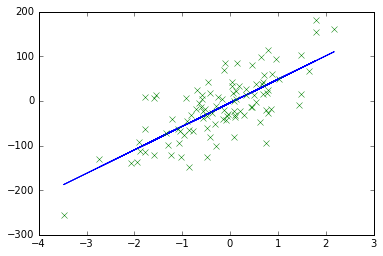

In [381]:
from sklearn.linear_model import LinearRegression

regr.fit(x1,y1)
#Print the score that the fit has
print regr.score(x1_test,y1_test)
#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'x')
plt.show()

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print regr.score(x2_test,y2_test)
#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

regr.fit(x4,y4)
#Print the score that the fit has
print regr.score(x4_test,y4_test)
#Plot the resulting line
plt.plot(x4,regr.predict(x4))
plt.plot(x4,y4,'x')
plt.show()


regr.fit(x3,y3)

print regr.score(x3_test,y3_test)

plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'x')
plt.show()



## Your analysis
The coefficient of determination anylizes the fitting of the line and takes into acount the noise/ variance of the data. This means that while a well fitting line through points that have a small varience gives a good score, at the same time a line through a data set with large varience can give the same score although it seems to be less fitting if one would only take into consideration the LMS.


The best possible score of 1.0 is achieved when the line fits perfectly through all the points, this is already not possible when a data set has noise; The more noise a data set has, the lower (or more negative) the score becomes.

However, it turns out that with a low amount of noise the data and the test data don't share the same hypothesis line, whereas with more noise the best fitted line on the data set and the test set become more similar. This is why there is often noise added to the data.

-0.398515258799


<function matplotlib.pyplot.show>

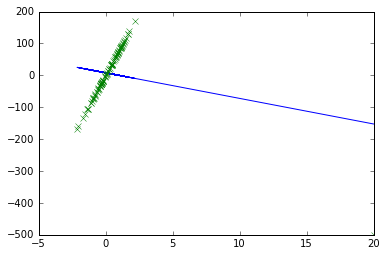

In [249]:
from sklearn.linear_model import LinearRegression
#Add a serious outlier and see what happens

#Example of creating big outlier:
x2[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y2[-1] = -500
regr = LinearRegression()
regr.fit(x2,y2)
print regr.score(x2_test,y2_test)

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'x')
plt.show


## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [320]:
#Make a prediction function h
def prediction_function(x,theta0,theta1): 
    result = theta0 + theta1*x
    return result



In [321]:
#Use the output of that function to compute the cost function J:
#x_predict is the variable in which the result of the prediction_funciton is stored.
def cost_function(x_predict,y):
    m = x_predict.size
    result = (1/(2.0*m))*sum((1.0 * x_predict - y)**2)
    return result

#.0 added to make sure python doesn't consider these numbers integers.


In [322]:
#Create a function that returns the gradient values, given h (x_predict), y and x:

#the partial derivative of the cost function, NOTE: for theta zero the *x must be *1!
def compute_gradient(x_predict,y,x):
    m = x_predict.size
    result = (1.0/m)*sum((x_predict - y)*x)
    return result

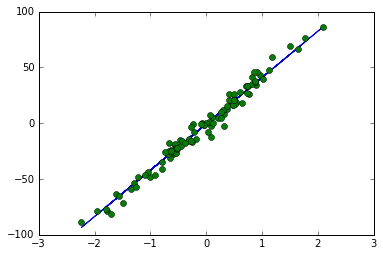

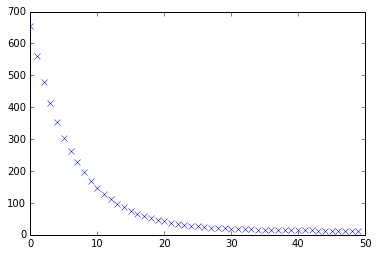

In [382]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
#.flatten() makes the data set created by make_regression() into a (n,) dimension instead of a (n,1)
x = x1.flatten()  
y = y1

iterations = 50
#Fill in the stopcondition yourself
stopcondition = 5 

i = 0
cost = 10

#Try to save the output of the cost function at each iteration and plot it at the end
#array that saves all values of costs
cost_array = [0] * iterations;

while (i < iterations) and (cost > stopcondition):

    x_predict = prediction_function(x,theta0,theta1)
            
    #x = 1, due to partial derivative with respect to theta0
    theta0_temp = alpha*compute_gradient(x_predict,y,1)
    theta1_temp = alpha*compute_gradient(x_predict,y,x)

    theta0 = theta0 - theta0_temp 
    theta1 = theta1 - theta1_temp
    
    cost = cost_function(x_predict,y)
    cost_array[i]= cost
    i = i + 1

number_of_iterations = np.arange(0,len(cost_array),1.0)
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

#Graph of cost-value of every iteration.
plt.plot(number_of_iterations,cost_array,'x')
plt.show()

#print cost_array




Using the given values for the parameters alhpa, theta0, and theta1, it can be seen from the graph that after around 25 iterations the cost function has reached a pretty good estimate for best fitting line. For theta0 = 0 and theta1= 1, the learning rate of 1.5 is approximatly the border on which the linear regression function still works. In general it can be seen that with a smaller learning the cost value takes longer to converge, but given enough iterations it mostly still works.


Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

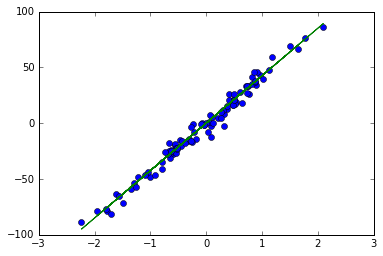

In [392]:
def compute_theta1(X,y):
    #transpose x_predict
    X_t = X.transpose()
    
    #calculate theta1  
    theta1 = numpy.dot(numpy.linalg.inv(numpy.dot(X_t,X)), numpy.dot(X_t,y))
    
    return theta1

x = x1
y = y1

theta1 = compute_theta1(x,y)

plt.plot(x,y,'o')
plt.plot(x,prediction_function(x,theta1))
plt.show()

